In [1]:
## importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve,auc

from scipy.io import arff
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = arff.loadarff('Training Dataset.arff')  # loading dataset
df = pd.DataFrame(data[0])                     # converting the data to a dataframe
for i in df:                                   # converting categorical objects to integers
    df.loc[:,i] = df.loc[:,i].astype(int)
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [3]:
## separating label/target from features( separating X from y )
X = df.drop('Result', axis=1)
X.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,1,-1,-1,-1,-1,1,1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,1,-1,-1,0,-1,1,1,1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,1,-1,1,-1,1,0,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
4,1,0,-1,1,1,-1,1,1,-1,1,...,1,-1,1,-1,-1,0,-1,1,1,1


In [4]:
y = df['Result']
y.head()

0   -1
1   -1
2   -1
3   -1
4    1
Name: Result, dtype: int32

In [5]:
## now we can split X and y into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=df['Result'])
## random state is set to zero to ensure reproduciability
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (7738, 30)
y_train (7738,)
X_test (3317, 30)
y_test (3317,)


In [6]:
from imblearn.over_sampling import SMOTE

# Create SMOTE object
smote = SMOTE(random_state=42)

# Apply SMOTE to generate synthetic samples
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print('X_train_resampled', X_train_resampled.shape)
print('y_train', y_train_resampled.shape)

X_train_resampled (8620, 30)
y_train (8620,)


## Applying Random Forest Classifier

In [7]:
## create rf model object
## fit the model
rf_classifier = RandomForestClassifier(n_estimators=8, criterion='entropy', random_state=0)
rf_classifier.fit(X_train_resampled, y_train_resampled)  



RandomForestClassifier(criterion='entropy', n_estimators=8, random_state=0)

In [8]:
## make predictions with X_test
y_pred_rf = rf_classifier.predict(X_test)
y_pred_rf 

array([ 1,  1, -1, ...,  1,  1, -1])

In [9]:
## evaluation with confusion matrix
conf_mat_rf = confusion_matrix(y_test, y_pred_rf)
print(conf_mat_rf)

[[1415   55]
 [  49 1798]]


Text(0.5, 427.9555555555555, 'Predicted label')

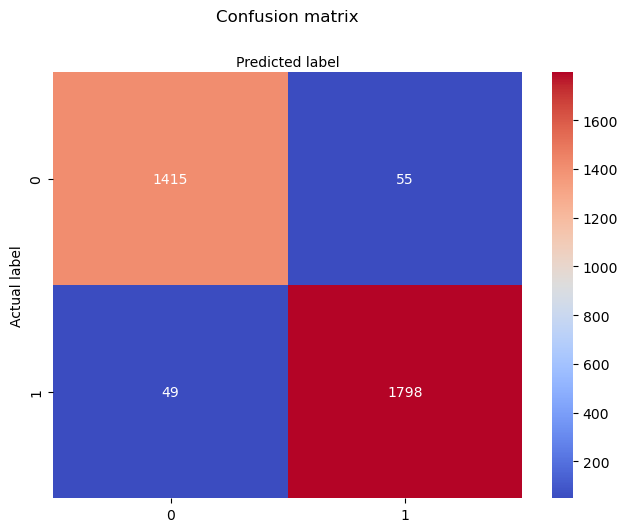

In [10]:
## visualizing the confusion matrix
## visualize the confusion matrix
class_names=[-1,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# creating heatmap
sns.heatmap(pd.DataFrame(conf_mat_rf), annot=True,cmap='coolwarm', fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

In [11]:
## accuracy , precison and recall score report
print("Accuracy", metrics.accuracy_score(y_test, y_pred_rf))
print("Precision", metrics.precision_score(y_test, y_pred_rf))
print("Recall", metrics.recall_score(y_test, y_pred_rf))

Accuracy 0.9686463671992764
Precision 0.9703184025903939
Recall 0.9734704926908501


In [12]:
## checking precision recall, and accuracy
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

          -1       0.97      0.96      0.96      1470
           1       0.97      0.97      0.97      1847

    accuracy                           0.97      3317
   macro avg       0.97      0.97      0.97      3317
weighted avg       0.97      0.97      0.97      3317



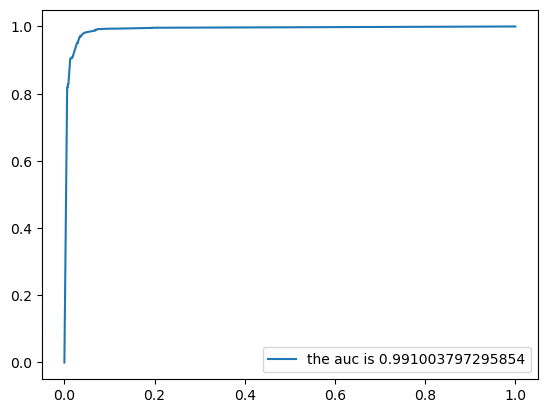

In [13]:
## ploting ROC curve
## ploting ROC curve
prob_y_pred = rf_classifier.predict_proba(X_test)[::,1]  ## why the ::
fpr, tpr, _ = metrics.roc_curve(y_test, prob_y_pred)  ## why the underscore?
auc = metrics.roc_auc_score(y_test, prob_y_pred)
plt.plot(fpr, tpr, label='the auc is ' + str(auc))
plt.legend(loc=4)
plt.show()

## Applying XGboost Classifier

In [14]:
y_train_xgb = np.where(y_train_resampled == -1, 0, y_train_resampled) ## converting -1 class to zero since xgboostclassifier expects o or 1
y_test_xgb =  np.where(y_test == -1, 0, y_test)
## training and making predictions
xgb = XGBClassifier(n_estimators=100)
xgb.fit(X_train_resampled, y_train_xgb)
y_pred_xgb = xgb.predict(X_test)
y_pred_xgb

array([1, 1, 1, ..., 1, 1, 0])

In [15]:
## evaluation with confusion matrix
conf_mat_xgb = confusion_matrix(y_test_xgb, y_pred_xgb)
print(conf_mat_xgb)

[[1417   53]
 [  46 1801]]


Text(0.5, 427.9555555555555, 'Predicted label')

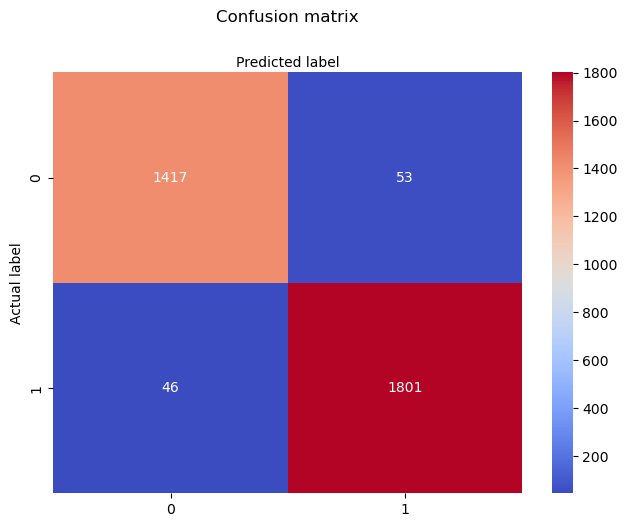

In [16]:
## visualizing the confusion matrix
## visualize the confusion matrix
class_names=[-1,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# creating heatmap
sns.heatmap(pd.DataFrame(conf_mat_xgb), annot=True,cmap='coolwarm', fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

In [17]:
## accuracy , precison and recall score report
print("Accuracy", metrics.accuracy_score(y_test_xgb, y_pred_xgb))
print("Precision", metrics.precision_score(y_test_xgb, y_pred_xgb))
print("Recall", metrics.recall_score(y_test_xgb, y_pred_xgb))

Accuracy 0.9701537533916189
Precision 0.9714131607335491
Recall 0.9750947482403898


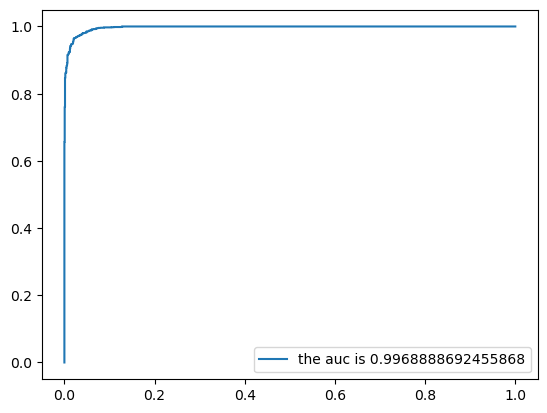

In [18]:
## ploting ROC curve
prob_y_pred = xgb.predict_proba(X_test)[::,1]  
fpr, tpr, _ = metrics.roc_curve(y_test, prob_y_pred) 
auc = metrics.roc_auc_score(y_test, prob_y_pred)
plt.plot(fpr, tpr, label='the auc is ' + str(auc))
plt.legend(loc=4)
plt.show()